### 1. **Data compilation**

*   1.1 Import original dataset and packages
*   1.2 Import 12 sets of PADEL fingerprint outputs
*   1.3 Define X and Y
*   1.4 Feature selection

### **2. Data splitting and modeling**


*   2.1 Data splitting
*   2.2 Random forest modeling and validation
*   2.3 Hyperparameter tuning
*   2.4 Modeling with tuned hyperparameters
*   2.5 Y-randomization

### **3. Feature importance**




### **1. Data compilation**

**1.1 Import original dataset and packages**

In [1]:
# import dataset file

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/GeorgeYuriCADD/IC50-dataset/main/478concise.csv')
df

,ID,pIC50,activity,Canonical SMILES
0,CHEMBL1327484,2.97,inactive,OC(=O)CSc1ccnc2c1ccc(c2)Cl
1,CHEMBL1379384,2.51,inactive,CCCc1ccc(cc1)C(=O)CCC(=O)O
2,CHEMBL1560,4.30,inactive,SC[C@H](C(=O)N1CCC[C@H]1C(=O)O)C
3,CHEMBL3278535,3.32,inactive,N#Cc1coc2c(c1=O)cccc2
4,CHEMBL3808541,6.01,active,O=C(Nc1ccccc1C)CSc1nnc([nH]1)c1ccc(cc1)O
...,...,...,...,...
473,lit95,4.28,inactive,CC(C(=O)Nc1ncc(s1)Br)CS
474,lit96,4.29,inactive,OC(=O)CN(CC(=O)O)CCc1cccs1
475,lit97,4.30,inactive,C[C@H]([C@H]1C(=O)N2[C@@H]1CC(=C2C(=O)O)S[C@H]...
476,lit98,4.31,inactive,OC(=O)CNC(=O)c1cccc(n1)C(=O)O


**1.2 Import 12 sets of PADEL fingerprint outputs**

In [ ]:
# A
descriptors = pd.read_csv('https://raw.githubusercontent.com/GeorgeYuriCADD/IC50-dataset/main/AtomPairs2D_478.csv')

In [ ]:
# A
descriptors = pd.read_csv('https://raw.githubusercontent.com/GeorgeYuriCADD/IC50-dataset/main/AtomPairs2DCount_478.csv')

In [ ]:
# C
descriptors = pd.read_csv('https://raw.githubusercontent.com/GeorgeYuriCADD/IC50-dataset/main/CDK_478.csv')

In [ ]:
# C
descriptors = pd.read_csv('https://raw.githubusercontent.com/GeorgeYuriCADD/IC50-dataset/main/CDKextended_478.csv')

In [ ]:
# C
descriptors = pd.read_csv('https://raw.githubusercontent.com/GeorgeYuriCADD/IC50-dataset/main/CDKgraphonly_478.csv')

In [ ]:
# E
descriptors = pd.read_csv('https://raw.githubusercontent.com/GeorgeYuriCADD/IC50-dataset/main/EState_478.csv')

In [ ]:
# M
descriptors = pd.read_csv('https://raw.githubusercontent.com/GeorgeYuriCADD/IC50-dataset/main/MACCS_478.csv')

In [ ]:
# K
descriptors = pd.read_csv('https://raw.githubusercontent.com/GeorgeYuriCADD/IC50-dataset/main/KlekotaRoth_478.csv')

In [ ]:
# K
descriptors = pd.read_csv('https://raw.githubusercontent.com/GeorgeYuriCADD/IC50-dataset/main/KlekotaRothCount_478.csv')

In [2]:
# P
descriptors = pd.read_csv('https://raw.githubusercontent.com/GeorgeYuriCADD/IC50-dataset/main/PubChem_478.csv')

In [ ]:
# S
descriptors = pd.read_csv('https://raw.githubusercontent.com/GeorgeYuriCADD/IC50-dataset/main/Substructure_478.csv')

In [ ]:
# S 
descriptors = pd.read_csv('https://raw.githubusercontent.com/GeorgeYuriCADD/IC50-dataset/main/SubstructureCount_478.csv')

In [3]:
df3 = descriptors
df3

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL1327484,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,CHEMBL1379384,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CHEMBL1560,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CHEMBL3278535,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,CHEMBL3808541,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,lit95,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
474,lit96,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
475,lit97,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
476,lit98,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**1.3 Define X and Y**

In [4]:
X_raw = descriptors.drop('Name', axis=1)
Y_raw = df['pIC50']

**1.4 Feature selection**

In [6]:
# removing low variance features

from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X_lowvariance = remove_low_variance(X_raw, threshold=0.1)
X_lowvariance

,PubchemFP2,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP33,PubchemFP143,PubchemFP145,PubchemFP146,PubchemFP178,PubchemFP179,PubchemFP180,PubchemFP181,PubchemFP185,PubchemFP186,PubchemFP192,PubchemFP255,PubchemFP256,PubchemFP257,PubchemFP259,PubchemFP285,PubchemFP293,PubchemFP299,PubchemFP300,PubchemFP308,PubchemFP333,PubchemFP335,PubchemFP338,PubchemFP340,PubchemFP341,PubchemFP345,PubchemFP346,PubchemFP349,PubchemFP351,PubchemFP353,PubchemFP355,PubchemFP356,PubchemFP357,...,PubchemFP657,PubchemFP658,PubchemFP659,PubchemFP660,PubchemFP664,PubchemFP665,PubchemFP666,PubchemFP667,PubchemFP668,PubchemFP671,PubchemFP672,PubchemFP674,PubchemFP677,PubchemFP678,PubchemFP679,PubchemFP680,PubchemFP683,PubchemFP684,PubchemFP688,PubchemFP689,PubchemFP691,PubchemFP692,PubchemFP695,PubchemFP696,PubchemFP697,PubchemFP698,PubchemFP699,PubchemFP702,PubchemFP704,PubchemFP708,PubchemFP709,PubchemFP710,PubchemFP712,PubchemFP714,PubchemFP758,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP819,PubchemFP821
0,0,0,1,0,0,1,0,1,0,0,0,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,1,1,1,1,...,1,1,0,1,1,1,0,0,1,0,0,0,1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,1
1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0,...,0,0,0,1,1,0,0,0,1,1,1,0,1,1,1,1,0,1,1,1,0,1,0,1,1,1,1,0,1,1,1,1,0,0,0,1,0,0,0,0
2,0,0,1,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,1,0,1,0,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,1,1,1,0,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,1,0
4,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,0,1,1,1,1,1,0,...,1,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,1,0,1,1,1,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,0,0,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,0,0,0,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
474,0,0,1,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,1,1,1,0,0,...,0,1,1,1,1,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
475,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,...,0,1,1,1,0,0,0,1,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0
476,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,...,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### **2. Data splitting and modeling**

**2.1 Data splitting**

In [7]:
# split dataset into training set and test set by 80/20 ratio

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_lowvariance, Y_raw, test_size=0.2,random_state=42)

In [8]:
X_train.shape, X_test.shape

((382, 242), (96, 242))

In [9]:
Y_train.shape, Y_test.shape

((382,), (96,))

In [10]:
X_test

,PubchemFP2,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP33,PubchemFP143,PubchemFP145,PubchemFP146,PubchemFP178,PubchemFP179,PubchemFP180,PubchemFP181,PubchemFP185,PubchemFP186,PubchemFP192,PubchemFP255,PubchemFP256,PubchemFP257,PubchemFP259,PubchemFP285,PubchemFP293,PubchemFP299,PubchemFP300,PubchemFP308,PubchemFP333,PubchemFP335,PubchemFP338,PubchemFP340,PubchemFP341,PubchemFP345,PubchemFP346,PubchemFP349,PubchemFP351,PubchemFP353,PubchemFP355,PubchemFP356,PubchemFP357,...,PubchemFP657,PubchemFP658,PubchemFP659,PubchemFP660,PubchemFP664,PubchemFP665,PubchemFP666,PubchemFP667,PubchemFP668,PubchemFP671,PubchemFP672,PubchemFP674,PubchemFP677,PubchemFP678,PubchemFP679,PubchemFP680,PubchemFP683,PubchemFP684,PubchemFP688,PubchemFP689,PubchemFP691,PubchemFP692,PubchemFP695,PubchemFP696,PubchemFP697,PubchemFP698,PubchemFP699,PubchemFP702,PubchemFP704,PubchemFP708,PubchemFP709,PubchemFP710,PubchemFP712,PubchemFP714,PubchemFP758,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP819,PubchemFP821
469,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,1,0,1,1,1,0,...,0,0,0,1,1,0,0,0,1,0,0,0,1,1,1,1,0,1,1,1,0,1,0,1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
33,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1,1,1,0,1,0,1,1,0,...,0,0,1,1,1,0,1,0,1,1,1,0,1,1,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0
131,0,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,1,1,1,0,...,1,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,0,1,0,0,1,0,0,0
72,1,1,0,0,0,1,0,0,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,1,1,1,0,0,1,1,1,1,0,0,1,1,1,0,0
78,0,0,1,1,0,0,0,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,1,1,1,1,0,1,...,1,0,0,1,1,1,0,0,1,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,1,1,1,0,0,1,1,1,1,0,0,1,1,1,0,0
42,1,0,1,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1,1,0,...,0,1,0,1,1,0,0,0,1,1,1,0,1,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0
248,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,1,0,0,0,1,0,1,1,1,1,1,0,...,0,0,0,1,1,0,0,0,1,0,0,0,1,1,1,0,1,1,1,0,0,1,0,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0
296,0,0,1,0,0,1,0,1,1,0,1,1,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,1,1,0,1,1,1,1,0,...,0,0,1,1,1,0,1,0,1,1,1,0,1,1,1,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


**2.2 Random forest modeling and validation**

In [11]:
# import Regressor 

from sklearn.ensemble import RandomForestRegressor

In [12]:
rf0 = RandomForestRegressor(n_estimators=500, max_features=3, random_state=42)
rf0.fit(X_train,Y_train)

RandomForestRegressor(max_features=3, n_estimators=500, random_state=42)

In [13]:
# establish prediction

Y_train_pred = rf0.predict(X_train)
Y_test_pred = rf0.predict(X_test)

In [14]:
# model performance

import pickle
import numpy as np 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import missingno as msno 
import seaborn as sns 

# Calculating model performance
r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)

rmse_train = mean_squared_error(Y_train, Y_train_pred,squared= False)
rmse_test = mean_squared_error(Y_test, Y_test_pred,squared= False)


# Preparing performance summary table
model_name = pd.Series([rf0], name='Algorithm')

r2_train_series = pd.Series(r2_train, name='r2_train')
r2_test_series = pd.Series(r2_test, name='r2_test')

rmse_train_series = pd.Series(rmse_train, name='rmse_train')
rmse_test_series = pd.Series(rmse_test, name='rmse_test')

performance_metrics = pd.concat([model_name,
                                   r2_train_series, r2_test_series, 
                                   rmse_train_series, rmse_test_series, 
                                  ], axis=1)

performance_metrics['r2_train-test'] = abs(performance_metrics['r2_train'] - performance_metrics['r2_test'])

performance_metrics

,Algorithm,r2_train,r2_test,rmse_train,rmse_test,r2_train-test
0,"(DecisionTreeRegressor(max_features=3, random_...",0.932265,0.609535,0.300043,0.758069,0.32273


**2.3 Hyperparameter tuning**

In [15]:
from sklearn.model_selection import GridSearchCV
import numpy as np

max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(0,600,15)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

grid=GridSearchCV(rf0,param_grid,scoring='r2',cv=3,verbose=3)


In [16]:
# fit the grid
grid.fit(X_train, Y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV 1/3] END ......max_features=1, n_estimators=0;, score=nan total time=   0.0s
[CV 2/3] END ......max_features=1, n_estimators=0;, score=nan total time=   0.0s
[CV 3/3] END ......max_features=1, n_estimators=0;, score=nan total time=   0.0s
[CV 1/3] END ...max_features=1, n_estimators=15;, score=0.439 total time=   0.0s
[CV 2/3] END ...max_features=1, n_estimators=15;, score=0.474 total time=   0.0s
[CV 3/3] END ...max_features=1, n_estimators=15;, score=0.250 total time=   0.0s
[CV 1/3] END ...max_features=1, n_estimators=30;, score=0.490 total time=   0.1s
[CV 2/3] END ...max_features=1, n_estimators=30;, score=0.407 total time=   0.1s
[CV 3/3] END ...max_features=1, n_estimators=30;, score=0.312 total time=   0.1s
[CV 1/3] END ...max_features=1, n_estimators=45;, score=0.479 total time=   0.1s
[CV 2/3] END ...max_features=1, n_estimators=45;, score=0.433 total time=   0.1s
[CV 3/3] END ...max_features=1, n_estimators=4

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 384, in fit
    self._validate_estimator()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_base.py", line 140, in _validate_estimator
    self.n_estimators
ValueError: n_estimators must be greater than zero, got 0.

  

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(max_features=3, n_estimators=500,
                                             random_state=42),
             param_grid={'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150, 165, 180,
       195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360, 375,
       390, 405, 420, 435, 450, 465, 480, 495, 510, 525, 540, 555, 570,
       585])},
             scoring='r2', verbose=3)

In [17]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'max_features': 5, 'n_estimators': 105} with a score of 0.44


In [18]:
import pandas as pd

grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["score"])],axis=1)
grid_results

,max_features,n_estimators,score
0,1,0,NaN
1,1,15,0.387558
2,1,30,0.402758
3,1,45,0.412574
4,1,60,0.425965
...,...,...,...
195,5,525,0.434022
196,5,540,0.432930
197,5,555,0.433398
198,5,570,0.434145


In [19]:
grid_contour = grid_results.groupby(['max_features','n_estimators']).mean()
grid_contour

score
max_features n_estimators          
1            0                  NaN
             15            0.387558
             30            0.402758
             45            0.412574
             60            0.425965
...                             ...
5            525           0.434022
             540           0.432930
             555           0.433398
             570           0.434145
             585           0.434293

[200 rows x 1 columns]

In [20]:
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['max_features', 'n_estimators', 'r2']
grid_pivot = grid_reset.pivot('max_features', 'n_estimators')
grid_pivot

r2                      ...                              
n_estimators 0         15        30   ...       555       570       585
max_features                          ...                              
1            NaN  0.387558  0.402758  ...  0.418685  0.418153  0.417145
2            NaN  0.363317  0.426245  ...  0.427566  0.427939  0.427436
3            NaN  0.410259  0.434702  ...  0.427273  0.427063  0.425561
4            NaN  0.385717  0.393641  ...  0.427385  0.427386  0.425796
5            NaN  0.420158  0.422353  ...  0.433398  0.434145  0.434293

[5 rows x 40 columns]

In [21]:
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values

In [22]:
import plotly.graph_objects as go

# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_features') 
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )

fig.update_layout(title='NDM-1 hyperparameter tuning', autosize=False,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

**2.4 Modeling with tuned hyperparameters**

In [23]:
rf1 = RandomForestRegressor(n_estimators = 105, max_features= 5, random_state= 42)
rf1.fit(X_train, Y_train)

RandomForestRegressor(max_features=5, n_estimators=105, random_state=42)

In [24]:
Y_train_pred1 = rf1.predict(X_train)
Y_test_pred1 = rf1.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<function matplotlib.pyplot.show>

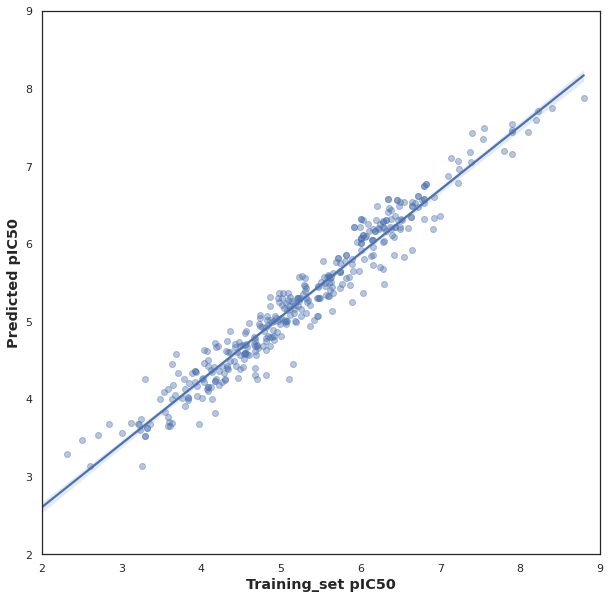

In [25]:
# scatter plot to visualize and evaluate model
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_train, Y_train_pred1, scatter_kws={'alpha':0.4})
ax.set_xlabel('Training_set pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(2, 9)
ax.set_ylim(2, 9)
ax.figure.set_size_inches(10, 10)
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<function matplotlib.pyplot.show>

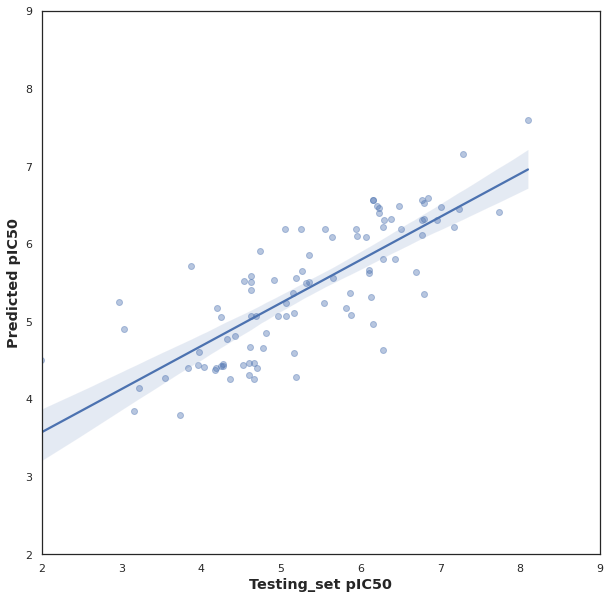

In [26]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_test_pred1, scatter_kws={'alpha':0.4})
ax.set_xlabel('Testing_set pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(2, 9)
ax.set_ylim(2, 9)
ax.figure.set_size_inches(10, 10)
plt.show

In [27]:
# model performance

r2_train = r2_score(Y_train, Y_train_pred1)
r2_test = r2_score(Y_test, Y_test_pred1)

rmse_train = mean_squared_error(Y_train, Y_train_pred1,squared= False)
rmse_test = mean_squared_error(Y_test, Y_test_pred1,squared= False)


# Preparing performance summary table
model_name = pd.Series([rf1], name='Algorithm')

r2_train_series = pd.Series(r2_train, name='r2_train')
r2_test_series = pd.Series(r2_test, name='r2_test')

rmse_train_series = pd.Series(rmse_train, name='rmse_train')
rmse_test_series = pd.Series(rmse_test, name='rmse_test')

performance_metrics = pd.concat([model_name,
                                   r2_train_series, r2_test_series, 
                                   rmse_train_series, rmse_test_series, 
                                  ], axis=1)

performance_metrics['r2_train-test'] = abs(performance_metrics['r2_train'] - performance_metrics['r2_test'])

performance_metrics

,Algorithm,r2_train,r2_test,rmse_train,rmse_test,r2_train-test
0,"(DecisionTreeRegressor(max_features=5, random_...",0.930903,0.623081,0.303044,0.744803,0.307821


In [28]:
# 10-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=42, shuffle=True)

# evaluate model
scores = cross_val_score(rf1, X_train, Y_train, cv=10, scoring='r2')

# report performance
print('r2: %.3f (%.3f)' % (mean(scores), std(scores)))


r2: 0.497 (0.179)


In [29]:
# 10-fold cross-validation

cv = KFold(n_splits=10, random_state=42, shuffle=True)

# evaluate model
scores = cross_val_score(rf1, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')

# report performance
print('neg_mean_squared_error: %.3f (%.3f)' % (mean(scores), std(scores)))
mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)
print(rmse_scores.mean())

neg_mean_squared_error: -0.619 (0.201)
[0.72281639 1.0010756  0.65893762 0.5392754  0.83398906 0.72581917
 0.81176874 0.69963742 0.82690229 0.94053709]
0.7760758792029765


**2.5 Y-ramdomization**

In [30]:
# Training on original target

import numpy as np
from sklearn.metrics import r2_score

rf1 = RandomForestRegressor(n_estimators = 105, max_features= 5, random_state= 42)
rf1.fit(X_train, Y_train)

Y_train_pred1 = rf1.predict(X_train)
original_r2 = r2_score(Y_train,Y_train_pred1)
print(original_r2)

0.9309028639114101


In [31]:
# Training on shuffuled target

shuffled_r2 = []
  
for i in range(100):
    np.random.shuffle(Y_raw)

    rf2 = RandomForestRegressor().fit(X_lowvariance,Y_raw)
      
    Y_train_pred2 = rf2.predict(X_train)
    Y_test_pred2 = rf2.predict(X_test)
    shuffled_r2.append(r2_score(Y_test,Y_test_pred2))
  
print(shuffled_r2[:20])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying t

[-0.5377094043177209, -0.5275939244799241, -0.3363051165791895, -0.11652859755787714, -0.0982662873544562, -0.15270567750568897, -0.44490926356049143, -0.33637077618696987, -0.30345646142849625, -0.1675040171714075, -0.34886025746609994, -0.5766477418192981, -0.2530296570132695, -0.5265362707308938, -0.47431852038851563, -0.44472117870342287, -0.3749982185982237, -0.49230896865465623, -0.442572317346293, -0.2517640388610247]


[(-1.0, 1.0)]

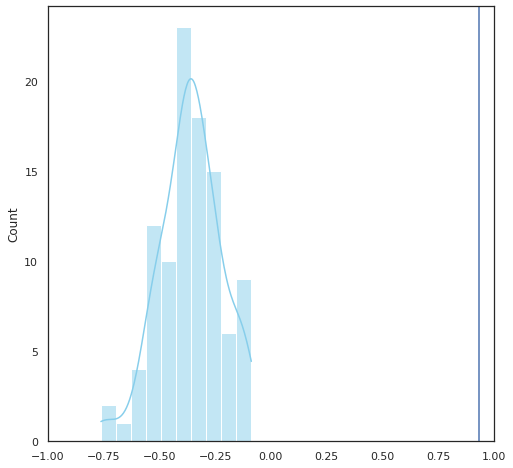

In [32]:
# Histogram plot

sns.set_style("white")
plt.figure(figsize = (8, 8)) 

ax = sns.histplot(data=shuffled_r2, color="skyblue", kde=True, bins = 10)
plt.axvline(original_r2)
ax.set(xlim=(-1, 1))

### **3. Feature importance**

In [33]:
df4 = pd.DataFrame(rf1.feature_names_in_)
df5= pd.DataFrame(rf1.feature_importances_)

In [34]:
df_importance = pd.concat([df4,df5],axis =1)
df_importance

,0,0
0,PubchemFP2,0.008560
1,PubchemFP12,0.009880
2,PubchemFP14,0.001837
3,PubchemFP15,0.006927
4,PubchemFP16,0.003842
...,...,...
237,PubchemFP776,0.007019
238,PubchemFP777,0.003784
239,PubchemFP797,0.004151
240,PubchemFP819,0.004834


In [35]:
df_importance.columns = ['Feature','importance']
df6 = df_importance.sort_values(by='importance',ascending=False).head(21)
df6

,Feature,importance
29,PubchemFP338,0.011696
47,PubchemFP374,0.011507
123,PubchemFP523,0.010649
64,PubchemFP392,0.010325
1,PubchemFP12,0.009880
7,PubchemFP33,0.009863
26,PubchemFP308,0.009036
186,PubchemFP628,0.008844
15,PubchemFP185,0.008779
91,PubchemFP451,0.008665


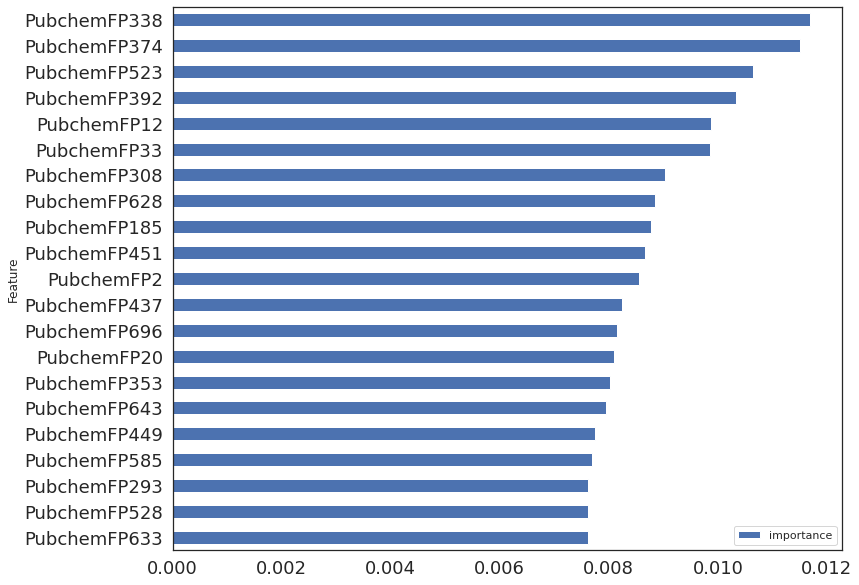

In [36]:
df6.sort_values(by='importance',ascending = True).plot(kind='barh',x='Feature',y='importance',figsize=(12,10),fontsize=18)